In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, roc_curve


In [27]:
 ## Load the combined dataset
df = pd.read_csv("social_media_fake_accounts.csv")
df

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,posts,followers,...,follow_ratio,engagement_rate,platform,connections,endorsements,skills listed,private profile,friends count,groups joined,posts shared
0,1,0.27,0.0,0.0,0.0,53,0.0,0.0,32.0,1000.0,...,1.046025,0.031968,Instagram,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,0.00,2.0,0.0,0.0,44,0.0,0.0,286.0,2740.0,...,5.131086,0.104341,Instagram,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,0.10,2.0,0.0,0.0,0,0.0,1.0,13.0,159.0,...,1.606061,0.081250,Instagram,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,0.00,1.0,0.0,0.0,82,0.0,0.0,679.0,414.0,...,0.634969,1.636145,Instagram,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,0.00,2.0,0.0,0.0,0,0.0,1.0,6.0,151.0,...,1.188976,0.039474,Instagram,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1771,1,NaN,NaN,NaN,NaN,142,NaN,NaN,NaN,NaN,...,NaN,NaN,Facebook,NaN,NaN,NaN,1.0,1892.0,9.0,143.0
1772,1,NaN,NaN,NaN,NaN,104,NaN,NaN,NaN,NaN,...,NaN,NaN,Facebook,NaN,NaN,NaN,1.0,2072.0,63.0,54.0
1773,0,NaN,NaN,NaN,NaN,102,NaN,NaN,NaN,NaN,...,NaN,NaN,Facebook,NaN,NaN,NaN,1.0,1249.0,99.0,175.0
1774,1,NaN,NaN,NaN,NaN,108,NaN,NaN,NaN,NaN,...,NaN,NaN,Facebook,NaN,NaN,NaN,1.0,848.0,23.0,257.0


In [41]:
df.shape

(1776, 23)

## Exploratory Data Analysis (EDA)

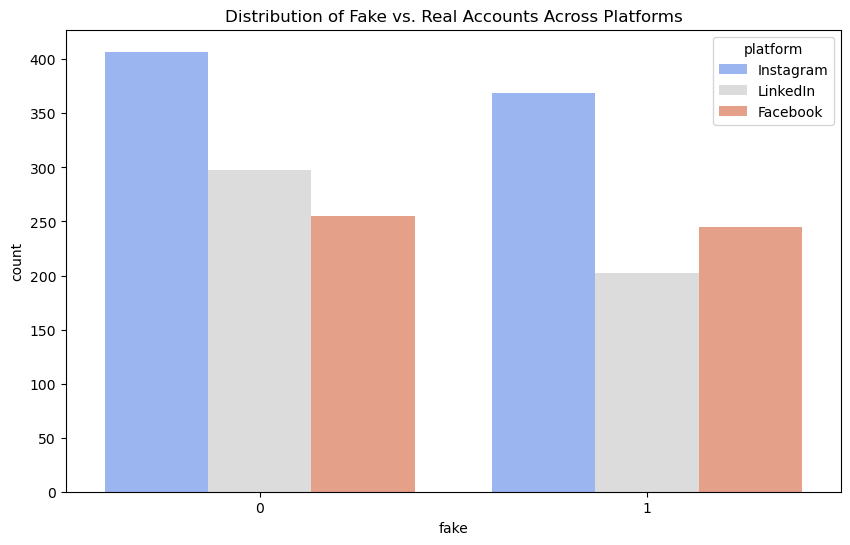

In [31]:
 ### Distribution of Fake vs. Real Accounts Across Platforms
plt.figure(figsize=(10, 6))
sns.countplot(x='fake', data=df, hue='platform', palette='coolwarm')
plt.title("Distribution of Fake vs. Real Accounts Across Platforms")
plt.show()

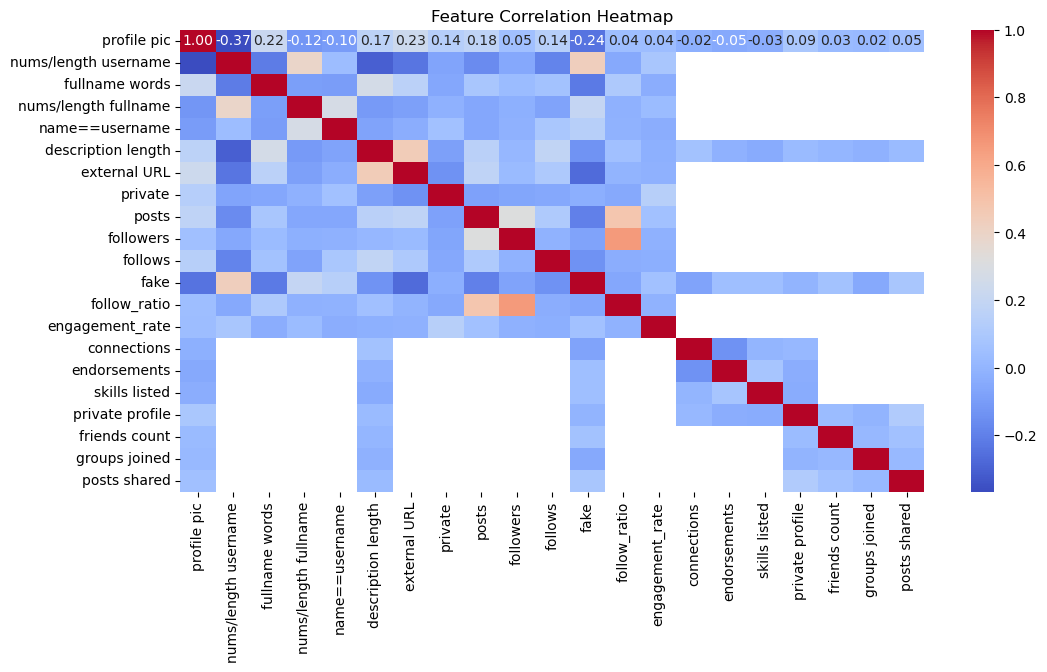

In [34]:
 ### Correlation Heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df.select_dtypes(include=[np.number]).corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()

## Data Preprocessing: Convert categorical variables to numerical

In [47]:
## Data Preprocessing: Convert categorical variables to numerical
#df = pd.get_dummies(df, columns=['platform'], drop_first=True)
#df.fillna(0, inplace=True)

### Training Model

In [49]:
# ## Splitting Data
X = df.drop(columns=['fake'])
y = df['fake']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
## Train an Optimized Machine Learning Model
model = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(max_depth=10, n_estimators=200, random_state=42)

In [54]:
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

In [56]:
## Evaluation Metrics
print("### Accuracy:", accuracy_score(y_test, y_pred))
print("\n### Classification Report:\n", classification_report(y_test, y_pred))
print("\n### Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

### Accuracy: 0.6629213483146067

### Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.74      0.71       196
           1       0.64      0.57      0.60       160

    accuracy                           0.66       356
   macro avg       0.66      0.65      0.65       356
weighted avg       0.66      0.66      0.66       356


### Confusion Matrix:
 [[145  51]
 [ 69  91]]


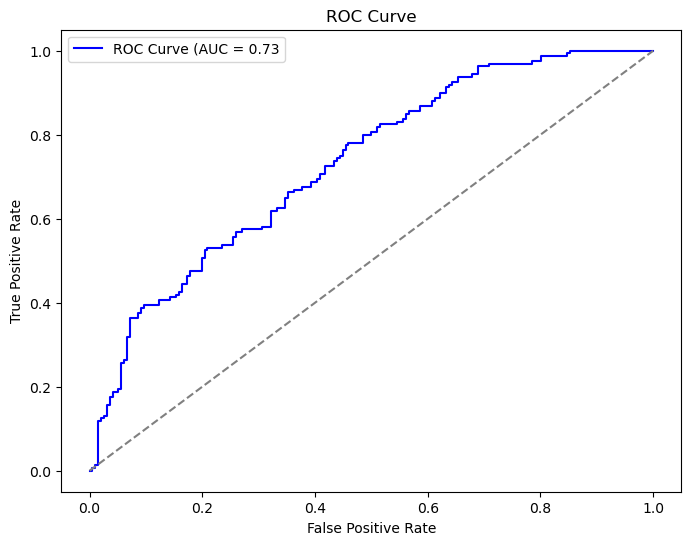

In [58]:
 ## ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc_score(y_test, y_pred_prob):.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()